# Import Library

In [4]:
import numpy as np
import pandas as pd

# Load Dataset

In [5]:
df = pd.read_csv('dataset/smsspamcollection.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


# EDA

In [14]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [21]:
len(df)

5572

In [23]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [26]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [27]:
df['label'].value_counts()['spam']*100/len(df)

13.406317300789663

In [28]:
df['label'].value_counts()['ham']*100/len(df)

86.59368269921033

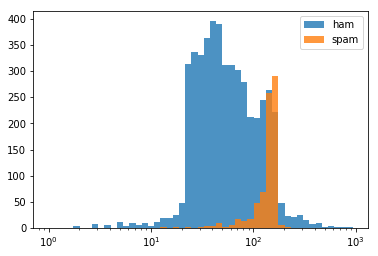

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [32]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

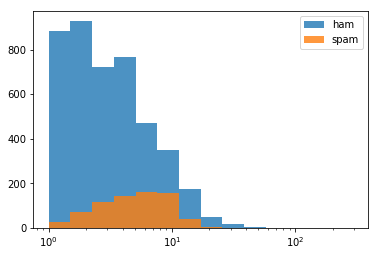

In [35]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [36]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

# Modeling

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# X feature data
X = df[['length','punct']]

# y label
y = df['label']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #30% test data

In [40]:
X_train.shape

(3900, 2)

In [41]:
X_test.shape

(1672, 2)

In [42]:
y_train

708      ham
4338     ham
5029     ham
4921     ham
2592     ham
2275     ham
1424     ham
1216     ham
5211     ham
4743     ham
314      ham
3915     ham
4434     ham
1427     ham
1780    spam
4988     ham
113      ham
960      ham
4793     ham
2794     ham
1114     ham
4104    spam
5571     ham
3749     ham
3956     ham
4397     ham
4168     ham
5048     ham
1730     ham
4314     ham
        ... 
2747     ham
2047     ham
2558    spam
1082     ham
474     spam
2904     ham
4843     ham
4117     ham
3385    spam
4555     ham
1184     ham
5051     ham
5311     ham
2433     ham
2391     ham
769      ham
1685     ham
130      ham
2919     ham
3171     ham
3444     ham
4426     ham
5334     ham
466      ham
3092    spam
3772     ham
5191     ham
5226     ham
5390     ham
860      ham
Name: label, Length: 3900, dtype: object

## Train a Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
y_pred = lr_model.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score

In [51]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(*[y_test,y_pred]))

[[1404   44]
 [ 219    5]]
              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



The result aren't good.\
Possibily because the dataset is unbalance and the feature isn't proper.

## Train Multiple Models

### Model
<ul>
    <li> Naive-bayes </li>
    <li> SVC </li>
    <li> Logistic Linear </li>
</ul>

In [67]:
# Function to train and test multiple models
# Iterate within dictionary

def train_test_model(model_dict):
    '''
    Train and Test Multiple models.
    Input : dict -> {'model name':model object, ...}
    Output : 2 dict contains trained model and model performance
    '''
    model_performance = dict()
    trained_model = dict()
    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_report = [y_test, y_pred]
        acc_score = accuracy_score(*y_report)
        pr_score = precision_score(*y_report,labels=['ham','spam'],pos_label='spam')
        rc_score = recall_score(*y_report,labels=['ham','spam'],pos_label='spam')
        print('\n')
        print(name)
        print(confusion_matrix(*y_report))
        print(classification_report(*y_report))
        trained_model[name] = model
        model_performance[name] = [acc_score, pr_score, rc_score]
    return trained_model, model_performance

In [70]:
# Define the model
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

nb_model = MultinomialNB() #naive-bayes
svc_model = SVC(gamma='auto') #SVC
lr_model = LogisticRegression(solver='lbfgs') #log-clf

model_dict = {'naive-bayes':nb_model, 'SVC':svc_model, 'log-clf':lr_model}

In [71]:
# Train and Test
trained_model, model_performance = train_test_model(model_dict)



naive-bayes
[[1438   10]
 [ 224    0]]
              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



SVC
[[1373   75]
 [ 121  103]]
              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

   micro avg       0.88      0.88      0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



log-clf
[[1404   44]
 [ 219    5]]
              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg     

In [72]:
model_performance

{'naive-bayes': [0.8600478468899522, 0.0, 0.0],
 'SVC': [0.8827751196172249, 0.5786516853932584, 0.45982142857142855],
 'log-clf': [0.8427033492822966, 0.10204081632653061, 0.022321428571428572]}

## Result

In [86]:
df_report = pd.DataFrame(data=model_performance,index=['accuracy','precision','recall']).transpose()

In [87]:
df_report

,accuracy,precision,recall
naive-bayes,0.860048,0.000000,0.000000
SVC,0.882775,0.578652,0.459821
log-clf,0.842703,0.102041,0.022321


SVC has best performance, but it is still lacking.